In [1]:
#For sklearn error
#!pip install scikit-learn
#For pandas error
#!pip install pandas
#For cv2 error
#!pip install opencv-python
#For PIL error
#!pip install PIL
#for keras error
#!pip install keras
#for tensorflow error
#!pip install tensorflow

#10/18
# if i_dif_flux_matrix.shape[1] != 120: → if i_dif_flux_matrix.shape[1] != 90:

#10/22
# 正規化したフラックスデータをjet規格でRGBに変換

# フラックスをlogスケールにし、0~1の範囲で正規化する関数

In [2]:
#NEW
import numpy as np

def log_norm(data, vmin=None, vmax=None):
    # データの最小値と最大値を指定しない場合、自動的に計算
    if vmin is None:
        vmin = np.min(data)
    if vmax is None:
        vmax = np.max(data)

    # 最小値と最大値をログスケールに変換
    log_min = np.log10(vmin) if vmin > 0 else 0  # vminが0以下の場合は0に設定
    log_max = np.log10(vmax) if vmax > 0 else 0  # vmaxが0以下の場合は0に設定

    # データをvminとvmaxの範囲にクリップ（vminより小さい値はvmin、vmaxより大きい値はvmaxに）
    clipped_data = np.clip(data, vmin, vmax)
    
    # 対数変換を行い、0〜1の範囲で正規化
    # クリッピング後のデータに対して対数変換を行う
    log_data = np.log10(clipped_data)  # クリップしたデータを対数変換
    
    # 正規化
    norm_data = (log_data - log_min) / (log_max - log_min)
    
    return norm_data


# ライブラリのインポート

In [3]:
import keras
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import re

def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+.(?:' + ext + '))', f.lower())]

In [4]:
#Number of recognition class
classNumber = 2

# 入力値を画像ではなくマトリックスにする

In [5]:
import os

In [6]:
#Import training data

X = []
Y = []
I = []
dataNum = []

for i in range(classNumber):
    filepath = '/Volumes/HD-PUSU3-D/training_data_90sec/class' + str(i+1) + '/'
    dataNum.append(0)
    print(filepath)
    # for picture in list_pictures(filepath):
        # origimg = load_img(picture, target_size=(40,100))
        # I.append(origimg)
        # i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
        # X.append(i_dif_flux_matrix)
        # Y.append(i)
        # dataNum[i] += 1
     # 指定したフォルダ内のすべてのCSVファイルを取得
    for filename in os.listdir(filepath):
        
        try:
            if filename.endswith('.csv'):
                fullpath = os.path.join(filepath, filename)
                i_dif_flux_matrix = pd.read_csv(fullpath, sep=',', header=None)
                
                # 行の長さが19行でない場合はスキップする
                if i_dif_flux_matrix.shape[0] != 19:
                    print(f"Skipped {filename}: Not 19 rows")
                    print(i_dif_flux_matrix.shape[1])
                    continue
                if i_dif_flux_matrix.shape[1] != 90:
                    print(f"Skipped {filename}: Not 90 columns")
                    print(i_dif_flux_matrix.shape[1])
                    continue
                
                
                X.append(i_dif_flux_matrix.values)  # データフレームをNumPy配列に変換
                Y.append(i)
                dataNum[i] += 1
        except:
            continue

     


    # i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
# print(type(userdicdf))

# arrayに変換
X = np.asarray(X)
# print(X)
Y = np.asarray(Y)
print(Y)
print(X.shape)
# for i in range(classNumber):
    # print(dataNum[i])

/Volumes/HD-PUSU3-D/training_data_90sec/class1/
/Volumes/HD-PUSU3-D/training_data_90sec/class2/
[0 0 0 ... 1 1 1]
(1544, 19, 90)


In [7]:
from io import BytesIO
from PIL import Image
#Import training data

X = []
Y = []
I = []
dataNum = []

for i in range(classNumber):
    filepath = '/Volumes/HD-PUSU3-D/training_data_90sec/class' + str(i+1) + '/'
    dataNum.append(0)
    print(filepath)
    # for picture in list_pictures(filepath):
        # origimg = load_img(picture, target_size=(40,100))
        # I.append(origimg)
        # i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
        # X.append(i_dif_flux_matrix)
        # Y.append(i)
        # dataNum[i] += 1
     # 指定したフォルダ内のすべてのCSVファイルを取得
    for filename in os.listdir(filepath):
        
        try:
            if filename.endswith('.csv'):
                fullpath = os.path.join(filepath, filename)
                i_dif_flux_matrix = pd.read_csv(fullpath, sep=',', header=None)
                
                # 行の長さが19行でない場合はスキップする
                if i_dif_flux_matrix.shape[0] != 19:
                    print(f"Skipped {filename}: Not 19 rows")
                    print(i_dif_flux_matrix.shape[1])
                    continue
                if i_dif_flux_matrix.shape[1] != 90:
                    print(f"Skipped {filename}: Not 120 columns")
                    print(i_dif_flux_matrix.shape[1])
                    continue
                
            
                
                X.append(i_dif_flux_matrix.values)  # データフレームをNumPy配列に変換
                Y.append(i)
                dataNum[i] += 1
        except:
            continue

     


    # i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
# print(type(userdicdf))

# arrayに変換
X = np.asarray(X)
# print(X)
Y = np.asarray(Y)
print(Y)
print(X.shape)
# for i in range(classNumber):
    # print(dataNum[i])

/Volumes/HD-PUSU3-D/training_data_90sec/class1/
/Volumes/HD-PUSU3-D/training_data_90sec/class2/
[0 0 0 ... 1 1 1]
(1544, 19, 90)


In [8]:
# Transform pixel value from 0 to 1

# X = X.astype('float32')
# X = X / 255.0
# Categorical class
Y = utils.to_categorical(Y, classNumber)

In [ ]:
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
# X=np.log10(X)


# norm = Normalize(vmin=1e2, vmax=1e6)

#Xをログスケールにして、値が1e2以下のものには0を代入
X = np.where((X <= 1e2) | np.isnan(X), 0, log_norm(X, vmin=1e2, vmax=1e6))

# X[np.isinf(X)] = 0
# X[np.isinf(X)] = np.nan
# X = np.where(np.log10(X) <= 0, 0, np.log10(X))
print(X)

#32ビットfloatに変換
X = X.astype('float32')
#XをConv2Dに入れるためチャンネル数の次元を追加(バッチサイズ、高さ、幅、チャンネル数)
# バッチ次元を追加して形状を (1539, 19, 120, 1) にする

print(X)
# X = np.expand_dims(X, axis=-1)
# X.shape



In [10]:
# カラーマップの作成
cmap = plt.get_cmap('jet')

# `jet`カラーマップを適用し、RGBリストに変換（最後の次元はRGBA）
rgb_X = cmap(X)

# RGBAからRGBに変換（αチャンネルを削除）
rgb_X = rgb_X[..., :3]  # 最後の次元（αチャンネル）を削除

# RGBリストの形状確認（(1544, 19, 90, 3)）
print(rgb_X.shape)  # (1544, 19, 90, 3)

(1544, 19, 90, 3)


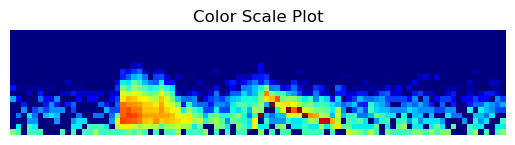

In [30]:
# データをカラースケールでプロット
plt.imshow(rgb_X[15, :, :])  # サイズ (19, 90) を表示
plt.title('Color Scale Plot')
plt.axis('off')  # 軸を非表示にする
plt.show()

In [12]:
# テストデータを検証データとテストデータに分割
X,valX, Y, valY = train_test_split(rgb_X, Y, test_size=0.3, random_state=42)


In [13]:
# X の最大値を表示
max_value = np.max(rgb_X)
print("X の最大値は:", max_value)

X の最大値は: 1.0


In [14]:
# Network setup

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Remove comments when low accuracy
'''
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classNumber))       # Number of class
model.add(Activation('softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

/Users/masunohayato/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
# from keras.optimizers import SGD

# # Model setup
# model = Sequential()
# # First Convolutional Layer
# model.add(Conv2D(32, (3, 3), padding='same', input_shape=X.shape[1:]))  # Adjust input_shape for binary images
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Second Convolutional Layer
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Fully Connected Layers
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# # Output Layer for binary classification
# model.add(Dense(2))  # 出力ユニット数を2に変更
# model.add(Activation('softmax'))  # softmaxアクティベーション

# # Compile the model
# model.compile(loss='binary_crossentropy',  # Binary classification loss function
#               optimizer=SGD(),             # Stochastic Gradient Descent
#               metrics=['accuracy'])


In [16]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
# from keras.optimizers import SGD

# # Model setup
# model = Sequential()
# # First Convolutional Layer
# model.add(Conv2D(32, (3, 3), padding='same', input_shape=X.shape[1:]))  # Adjust input_shape for binary images
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Second Convolutional Layer
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# # Fully Connected Layers
# model.add(Flatten())
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# # Output Layer for binary classification
# model.add(Dense(2))  # 出力ユニット数を2に変更
# model.add(Activation('softmax'))  # softmaxアクティベーション

# # Compile the model
# model.compile(loss='binary_crossentropy',  # Binary classification loss function
#               optimizer=SGD(),             # Stochastic Gradient Descent
#               metrics=['accuracy'])


In [17]:
# モデルのサマリーを表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 19, 90, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 19, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 88, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 17, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 44, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 44, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,767,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,778,850 (22.04 MB)

 Trainable params: 5,778,850 (22.04 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# モデルのトレーニング
history = model.fit(X, Y, batch_size=256, epochs=20,validation_data=(valX, valY))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.5281 - loss: 0.7184 - val_accuracy: 0.6983 - val_loss: 0.6681
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6119 - loss: 0.6666 - val_accuracy: 0.8039 - val_loss: 0.6389
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6457 - loss: 0.6537 - val_accuracy: 0.8017 - val_loss: 0.6138
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7001 - loss: 0.6203 - val_accuracy: 0.8125 - val_loss: 0.5876
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7673 - loss: 0.5882 - val_accuracy: 0.8017 - val_loss: 0.5608
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7784 - loss: 0.5725 - val_accuracy: 0.7780 - val_loss: 0.5402
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7696 - loss: 0.5574 - val_accuracy: 0.7543 - val_loss: 0.5325
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7753 - loss: 0.5423 - val_accuracy: 0.8103 - val_loss:

In [19]:
# ここでは2つ目のConv1D層の出力を取得するモデルを作成します。
intermediate_model = Model(inputs=model.input, outputs=model.get_layer(index=2).output)

# サンプルデータを使って中間層の出力を計算
intermediate_output = intermediate_model.predict(X)

print("Intermediate layer output shape:", intermediate_output.shape)

NameError: name 'Model' is not defined

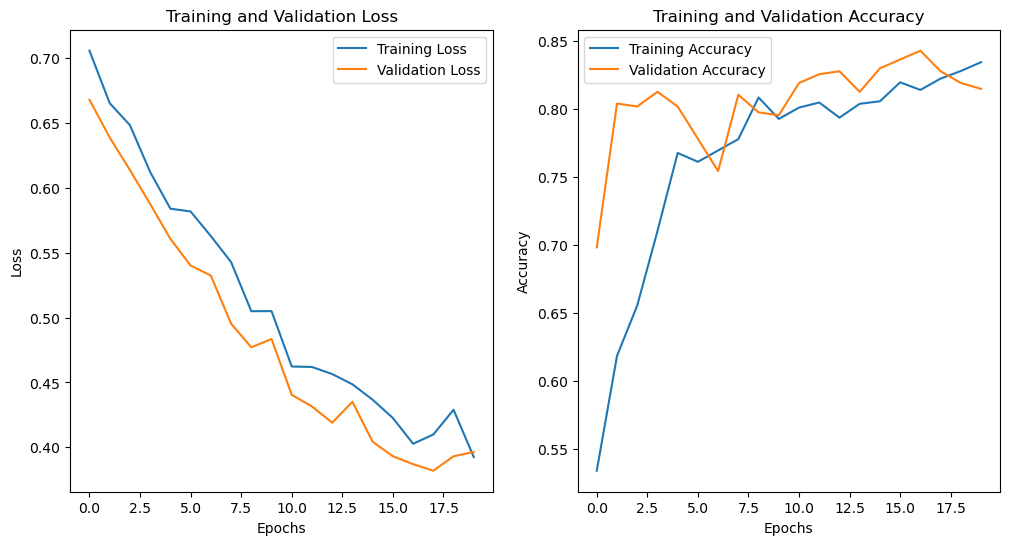

In [20]:

# 訓練と検証の損失をプロット
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [21]:
# Confusion matrix

# Classify training data
predict_classes = np.argmax(model.predict(X), axis=-1)

mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(Y, axis=1)})
print(predict_classes)
print(np.argmax(Y, axis=1))
# Show confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[0 0 1 ... 0 1 1]
[0 0 1 ... 1 1 1]


predict,0,1
class,,
0,482,89
1,97,412


In [22]:
# Classification result for each training data

predict_classes

array([0, 0, 1, ..., 0, 1, 1])

In [23]:
# Import test data

testX = []
testY = []
testI = []
testdataNum = []

for i in range(classNumber):
    filepath = '/Volumes/HD-PUSU3-D/training_data_90sec/test' + str(i+1) + '/'
    testdataNum.append(0)
    for filename in os.listdir(filepath):
        try:
            if filename.endswith('.csv'):
                fullpath = os.path.join(filepath, filename)
                i_dif_flux_matrix = pd.read_csv(fullpath, sep=',', header=None)
                
                # 行の長さが19行でない場合はスキップする
                if i_dif_flux_matrix.shape[0] != 19:
                    print(f"Skipped {filename}: Not 19 rows")
                    print(i_dif_flux_matrix.shape[1])
                    continue
                if i_dif_flux_matrix.shape[1] != 90:
                    print(f"Skipped {filename}: Not 90 columns")
                    print(i_dif_flux_matrix.shape[1])
                    continue
                    
                testX.append(i_dif_flux_matrix.values)  # データフレームをNumPy配列に変換
                testY.append(i)
                dataNum[i] += 1
        except:
            continue

# i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
# print(type(userdicdf))

# arrayに変換
testX = np.asarray(testX)
testY = np.asarray(testY)
print(testX.shape)
# for i in range(classNumber):
    # print(dataNum[i])


#Xをログスケールにして、値が1e2以下のものには0を代入
testX = np.where((testX <= 1e2) | np.isnan(testX), 0, log_norm(testX, vmin=1e2, vmax=1e6))

#32ビットfloatに変換
testX = testX.astype('float32')
# testX = np.expand_dims(testX, axis=-1)

print(testX.shape)

Skipped 20170131_235929.csv: Not 90 columns
76
(656, 19, 90)
(656, 19, 90)


In [24]:
testY = utils.to_categorical(testY, classNumber)
print(testY)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [25]:
# カラーマップの作成
cmap = plt.get_cmap('jet')

# `jet`カラーマップを適用し、RGBリストに変換（最後の次元はRGBA）
rgb_testX = cmap(testX)

# RGBAからRGBに変換（αチャンネルを削除）
rgb_testX = rgb_testX[..., :3]  # 最後の次元（αチャンネル）を削除

# RGBリストの形状確認（(1544, 19, 90, 3)）
print(rgb_testX.shape)  # (1544, 19, 90, 3)

(656, 19, 90, 3)


In [26]:
# Confusion matrix

# Classify test data
test_predict_classes = np.argmax(model.predict(rgb_testX), axis=-1)

mg_df = pd.DataFrame({'predict': test_predict_classes, 'class': np.argmax(testY, axis=1)})

# Show confusion matrix
print('test data result\n')
pd.crosstab(mg_df['class'], mg_df['predict'])

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
test data result



predict,0,1
class,,
0,298,43
1,5,310


In [27]:
# Classification result for each test data

test_predict_classes

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [28]:
# Export the training result

model.save('cnn_90s.h5')